In [ ]:
pip install vaderSentiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/TEXT MINING/DATASET/drugsCom_raw.zip" -d "/content"

Archive:  /content/drive/MyDrive/Colab Notebooks/TEXT MINING/DATASET/drugsCom_raw.zip
  inflating: /content/drugsComTest_raw.tsv  
  inflating: /content/drugsComTrain_raw.tsv  


# **Load Library**

In [ ]:

# Librerie Generiche

import pandas as pd
import numpy as np
import tensorflow as tf
from time import time
import seaborn as sns


# SKLEARN
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,  RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.estimator_checks import check_estimator

# MATPLOTLIB 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# TextBlob - NLTK
import textblob
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('wordnet')

from wordcloud import WordCloud

np.random.seed(1234)
tf.random.set_seed(1234)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/content/drugsComTrain_raw.tsv', sep='\t')

In [ ]:
# clean dataset

df = df.dropna()
df = df.drop_duplicates(subset=['review'], ignore_index=True)
df.columns = df.columns.str.lower()

#  Text Preprocessing

In [ ]:
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [ ]:
df['review'] = df['review'].str.replace('[^\w\s]', "")
df['review'] = df['review'].str.replace("&#039;", "")
df['review'] = df['review'].str.replace("[\d-]", "")
df['review'] = df['review'].str.replace("[^\w\s]", "") 
df['review'] = df['review'].str.replace(r'/^\s+|\s+$|\s+(?=\s)/g', '')
df['review'] = df['review'].str.replace(r'\s+',' ')
df.review.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    it has no side effect i take it in combination of bystolic mg and fish oil
1    my son is halfway through his fourth week of intuniv we became concerned when he began this last week when he started taking the highest dose he will be on for two days he could hardly get out of bed was very cranky and slept for nearly hours on a drive home from school vaca

In [ ]:
#Lemmatization

df['review'] = df['review'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.review.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          it ha no side effect i take it in combination of bystolic mg and fish oil
1    my son is halfway through his fourth week of intuniv we became concerned when he began this last week when he started taking the highest dose he will be on for two day he could hardly get out of bed wa very cranky and slept for nearly hour on a drive home from school vacation very unus

# **Text Rappresentation**

In [ ]:
# WordCloud

ds_usefulCount_tot = df.sort_values(by='usefulcount',ascending=False)
ds_usefulCount_t = ds_usefulCount_tot[:100]

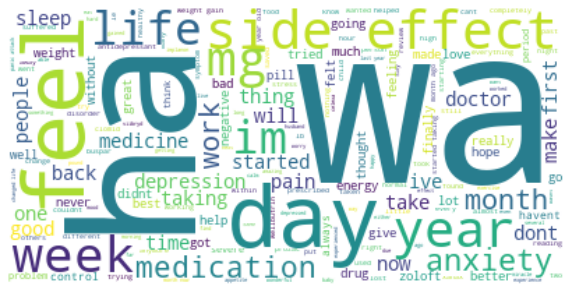

In [ ]:
# wordcloud tot

reviews_str = ds_usefulCount_t.review.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **Sentiment Analysis**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df['sentiment_rate'] = df['rating'].apply(lambda x: 'positive' if x > 5 else 'negative')

In [ ]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')

In [ ]:
accuracy_score(df['sentiment_rate'], df['comp_score'])

0.6367780206056822

In [ ]:
pd.DataFrame(classification_report(df['sentiment_rate'], df['comp_score'], output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.432669,0.831784,0.636778,0.632226,0.713076
recall,0.710764,0.605457,0.636778,0.658110,0.636778
f1-score,0.537898,0.700800,0.636778,0.619349,0.652349
support,33343.000000,78762.000000,0.636778,112105.000000,112105.000000


# **Vader Test**

In [ ]:
df_test = df.sample(1)
df_test_2 = df.sample(1)

In [ ]:
display(df_test, df_test_2)


,unnamed: 0,drugname,condition,review,rating,date,usefulcount,sentiment_rate,scores,compound,comp_score
21573,120607,Dicyclomine,Irritable Bowel Syndrome,this medication work wonder for me tend to get stomach cramp regularly i miss work sometimes because i am constantly running to the bathroom if i am travelling i have stop and use public restroom i never know when it going to hit me i am weak and faint sometimes from these flare the only draw back is that it make me feel tired and i get blurry vision it ha really helped me,9.0,"January 23, 2017",23,positive,"{'neg': 0.168, 'neu': 0.774, 'pos': 0.058, 'compound': -0.7506}",-0.7506,negative


,unnamed: 0,drugname,condition,review,rating,date,usefulcount,sentiment_rate,scores,compound,comp_score
8645,128900,Phentermine,Weight Loss,today is day i am not losing a rapidly a i wa in the first week with a loss of pound total putting me at i started at i am now weighing in at all the side effect are completely gone i still have to make myself eat i also go to the gym to time a week today i weighed in and went up pound not sure why i havent quotcheatedquot my diet i find that the smart one brand ha dessert to help those with a sweet tooth and you are not totally killing your success i hope to have better result coming in the near future,8.0,"May 28, 2014",18,positive,"{'neg': 0.037, 'neu': 0.73, 'pos': 0.233, 'compound': 0.9691}",0.9691,positive
